Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from statistics import mean
from sklearn.feature_selection import SelectKBest


In [37]:
url = 'https://drive.google.com/uc?export=download&id=1ulEQWFWdaNnJ2Lr9erwpMDR4mqa0jUdI'
df = pd.read_csv(url)
df

df.columns = df.columns.str.replace(" ","_")
df.rename(columns={"Innings_Date":"Match_Date"},inplace=True )
df

,Innings_Player,Innings_Runs_Scored,Innings_Runs_Scored_Num,Innings_Minutes_Batted,Innings_Batted_Flag,Innings_Not_Out_Flag,Innings_Balls_Faced,Innings_Boundary_Fours,Innings_Boundary_Sixes,Innings_Batting_Strike_Rate,...,Innings_Overs_Bowled,Innings_Bowled_Flag,Innings_Maidens_Bowled,Innings_Runs_Conceded,Innings_Wickets_Taken,4_Wickets,5_Wickets,10_Wickets,Innings_Wickets_Taken_Buckets,Innings_Economy_Rate
0,AD Hales,116*,116,97,1.0,1.0,64,11,6,181.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DJ Malan,103*,103,79,1.0,1.0,51,9,6,201.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LJ Wright,99*,99,83,1.0,1.0,55,8,6,180.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD Hales,99,99,84,1.0,0.0,68,6,4,145.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD Hales,94,94,80,1.0,0.0,61,11,2,154.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104617,Asghar Afghan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
104618,Najibullah Zadran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
104619,Hazratullah Zazai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
104620,Ibrahim Zadran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-


In [3]:
url1 = 'https://drive.google.com/uc?export=download&id=1yOWi4d1vV_FIFaXb_IcHLof-JLAun_vk'
df1 = pd.read_csv(url1)
df1.columns = df1.columns.str.replace(" ","_")
df1

,Result,Margin,Match,Home/Away,Ground,Match_Date,Match_Month,Match_Year,Match_Period,Matches,Country
0,Won,100 runs,England v Australia,Home,Southampton,2005/06/13,Jun,2005,Jun 2005,1,England
1,Lost,2 runs,England v Sri Lanka,Home,Southampton,2006/06/15,Jun,2006,Jun 2006,1,England
2,Lost,5 wickets,England v Pakistan,Home,Bristol,2006/08/28,Aug,2006,Aug 2006,1,England
3,Lost,77 runs,Australia v England,Away,Sydney,2007/01/09,Jan,2007,Jan 2007,1,England
4,Lost,15 runs,England v West Indies,Home,The Oval,2007/06/28,Jun,2007,Jun 2007,1,England
...,...,...,...,...,...,...,...,...,...,...,...
1642,Won,41 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/16,Nov,2019,Nov 2019,1,Afghanistan
1643,Won,29 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/17,Nov,2019,Nov 2019,1,Afghanistan
1644,Won,11 runs,Afghanistan v Ireland,Home,Greater Noida,2020/03/06,Mar,2020,Mar 2020,1,Afghanistan
1645,Won,21 runs,Afghanistan v Ireland,Home,Greater Noida,2020/03/08,Mar,2020,Mar 2020,1,Afghanistan


In [4]:
dfbat = df[['Innings_Player','Innings_Runs_Scored','Innings_Runs_Scored_Num','Innings_Minutes_Batted','Innings_Batted_Flag',
              'Innings_Not_Out_Flag','Innings_Balls_Faced','Innings_Boundary_Fours',
              'Innings_Boundary_Sixes','Innings_Batting_Strike_Rate','Innings_Number','Opposition','Ground','Match_Date',
              'Country',"50's","100's",'Innings_Runs_Scored_Buckets']]
dfbat = dfbat.dropna()
dfbat.drop(dfbat[dfbat['Innings_Runs_Scored'] == 'DNB'].index, inplace = True)
dfbat.replace('-', 0, inplace=True)
dfbat

,Innings_Player,Innings_Runs_Scored,Innings_Runs_Scored_Num,Innings_Minutes_Batted,Innings_Batted_Flag,Innings_Not_Out_Flag,Innings_Balls_Faced,Innings_Boundary_Fours,Innings_Boundary_Sixes,Innings_Batting_Strike_Rate,Innings_Number,Opposition,Ground,Match_Date,Country,50's,100's,Innings_Runs_Scored_Buckets
0,AD Hales,116*,116,97,1.0,1.0,64,11,6,181.25,2,v Sri Lanka,Chattogram,2014/03/27,England,0.0,1.0,100-149
1,DJ Malan,103*,103,79,1.0,1.0,51,9,6,201.96,1,v New Zealand,Napier,2019/11/08,England,0.0,1.0,100-149
2,LJ Wright,99*,99,83,1.0,1.0,55,8,6,180.00,1,v Afghanistan,Colombo (RPS),2012/09/21,England,1.0,0.0,50-99
3,AD Hales,99,99,84,1.0,0.0,68,6,4,145.58,2,v West Indies,Nottingham,2012/06/24,England,1.0,0.0,50-99
4,AD Hales,94,94,80,1.0,0.0,61,11,2,154.09,1,v Australia,Chester-le-Street,2013/08/31,England,1.0,0.0,50-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101617,Asghar Afghan,0,0,0,1.0,0.0,1,0,0,0.00,1,v Zimbabwe,Chattogram,2019/09/20,Afghanistan,0.0,0.0,0-49
101618,Asghar Afghan,0,0,0,1.0,0.0,2,0,0,0.00,1,v Bangladesh,Chattogram,2019/09/21,Afghanistan,0.0,0.0,0-49
101619,Rahmanullah Gurbaz,0,0,0,1.0,0.0,1,0,0,0.00,2,v West Indies,Lucknow,2019/11/14,Afghanistan,0.0,0.0,0-49
101620,Hazratullah Zazai,0,0,0,1.0,0.0,4,0,0,0.00,1,v West Indies,Lucknow,2019/11/17,Afghanistan,0.0,0.0,0-49


In [5]:
dfbowl = df[['Innings_Player', 'Innings_Overs_Bowled','Innings_Bowled_Flag',	'Innings_Maidens_Bowled',	'Innings_Runs_Conceded',	'Innings_Wickets_Taken',
             '4_Wickets','5_Wickets','10_Wickets','Innings_Wickets_Taken_Buckets',	'Innings_Economy_Rate', 'Match_Date', 'Country', 'Ground']]
dfbowl = dfbowl.dropna()
dfbowl.drop(dfbowl[dfbowl['Innings_Overs_Bowled'] == 'DNB'].index, inplace = True)
dfbowl


,Innings_Player,Innings_Overs_Bowled,Innings_Bowled_Flag,Innings_Maidens_Bowled,Innings_Runs_Conceded,Innings_Wickets_Taken,4_Wickets,5_Wickets,10_Wickets,Innings_Wickets_Taken_Buckets,Innings_Economy_Rate,Match_Date,Country,Ground
3994,CJ Jordan,2.0,1.0,0,6,4,1.0,0.0,0.0,0-4,3.00,2019/03/08,England,Basseterre
3995,DJ Willey,3.0,1.0,0,7,4,1.0,0.0,0.0,0-4,2.33,2019/03/10,England,Basseterre
3996,RS Bopara,3.4,1.0,0,10,4,1.0,0.0,0.0,0-4,2.72,2011/09/23,England,The Oval
3997,JL Denly,4.0,1.0,0,19,4,1.0,0.0,0.0,0-4,4.75,2018/10/27,England,Colombo (RPS)
3998,PD Collingwood,4.0,1.0,0,22,4,1.0,0.0,0.0,0-4,5.50,2006/06/15,England,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104218,Sayed Shirzad,4.0,1.0,0,42,0,1.0,0.0,0.0,0-4,10.50,2019/02/24,Afghanistan,Dehradun
104219,Mohammad Nabi,4.0,1.0,0,44,0,1.0,0.0,0.0,0-4,11.00,2016/12/16,Afghanistan,Dubai (DSC)
104220,Mohammad Nabi,4.0,1.0,0,46,0,1.0,0.0,0.0,0-4,11.50,2012/09/21,Afghanistan,Colombo (RPS)
104221,Mohammad Nabi,4.0,1.0,0,48,0,1.0,0.0,0.0,0-4,12.00,2017/03/08,Afghanistan,Greater Noida


In [6]:
df2 = df1.drop_duplicates(subset=['Match_Date', 'Country', 'Ground'])
dfbat_merge = pd.merge(dfbat,df2, on=['Match_Date', 'Country', 'Ground'], how='inner')
dfbat_merge

,Innings_Player,Innings_Runs_Scored,Innings_Runs_Scored_Num,Innings_Minutes_Batted,Innings_Batted_Flag,Innings_Not_Out_Flag,Innings_Balls_Faced,Innings_Boundary_Fours,Innings_Boundary_Sixes,Innings_Batting_Strike_Rate,...,100's,Innings_Runs_Scored_Buckets,Result,Margin,Match,Home/Away,Match_Month,Match_Year,Match_Period,Matches
0,AD Hales,116*,116,97,1.0,1.0,64,11,6,181.25,...,1.0,100-149,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
1,EJG Morgan,57,57,73,1.0,0.0,38,7,2,150.00,...,0.0,50-99,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
2,RS Bopara,11*,11,15,1.0,1.0,6,2,0,183.33,...,0.0,0-49,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
3,JC Buttler,2,2,3,1.0,0.0,3,0,0,66.66,...,0.0,0-49,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
4,MJ Lumb,0,0,2,1.0,0.0,5,0,0,0.00,...,0.0,0-49,Won,6 wickets,England v Sri Lanka,Home,Mar,2014,Mar 2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38305,Amir Hamza,6*,6,0,1.0,1.0,4,1,0,150.00,...,0.0,0-49,Lost,29 runs,West Indies v Afghanistan,Away,Jun,2017,Jun 2017,1
38306,Noor Ali Zadran,6,6,0,1.0,0.0,6,1,0,100.00,...,0.0,0-49,Lost,29 runs,West Indies v Afghanistan,Away,Jun,2017,Jun 2017,1
38307,Rashid Khan,2,2,0,1.0,0.0,4,0,0,50.00,...,0.0,0-49,Lost,29 runs,West Indies v Afghanistan,Away,Jun,2017,Jun 2017,1
38308,Shafiqullah,1,1,0,1.0,0.0,1,0,0,100.00,...,0.0,0-49,Lost,29 runs,West Indies v Afghanistan,Away,Jun,2017,Jun 2017,1


In [7]:
dfbowl_merge = pd.merge(dfbowl,df2, on=['Match_Date', 'Country', 'Ground'], how='inner')
dfbowl_merge


,Innings_Player,Innings_Overs_Bowled,Innings_Bowled_Flag,Innings_Maidens_Bowled,Innings_Runs_Conceded,Innings_Wickets_Taken,4_Wickets,5_Wickets,10_Wickets,Innings_Wickets_Taken_Buckets,...,Country,Ground,Result,Margin,Match,Home/Away,Match_Month,Match_Year,Match_Period,Matches
0,CJ Jordan,2.0,1.0,0,6,4,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
1,LE Plunkett,2.5,1.0,0,8,2,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
2,AU Rashid,3.0,1.0,0,12,2,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
3,DJ Willey,3.0,1.0,0,18,2,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
4,TK Curran,1.0,1.0,0,1,0,1.0,0.0,0.0,0-4,...,England,Basseterre,Won,137 runs,West Indies v England,Away,Mar,2019,Mar 2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28382,Shapoor Zadran,3.0,1.0,0,28,1,1.0,0.0,0.0,0-4,...,Afghanistan,Mumbai,Lost,37 runs,Afghanistan v South Africa,Home,Mar,2016,Mar 2016,1
28383,Mohammad Nabi,4.0,1.0,0,35,1,1.0,0.0,0.0,0-4,...,Afghanistan,Mumbai,Lost,37 runs,Afghanistan v South Africa,Home,Mar,2016,Mar 2016,1
28384,Dawlat Zadran,3.0,1.0,0,46,1,1.0,0.0,0.0,0-4,...,Afghanistan,Mumbai,Lost,37 runs,Afghanistan v South Africa,Home,Mar,2016,Mar 2016,1
28385,Samiullah Shinwari,3.0,1.0,0,22,0,1.0,0.0,0.0,0-4,...,Afghanistan,Mumbai,Lost,37 runs,Afghanistan v South Africa,Home,Mar,2016,Mar 2016,1


In [8]:
battrain = dfbat_merge[dfbat_merge.Match_Year.between(2014,2017)]
batval = dfbat_merge[dfbat_merge['Match_Year'] == 2018]
battest = dfbat_merge[dfbat_merge['Match_Year'] == 2019]
battrain.shape, batval.shape, battest.shape



((11559, 26), (3876, 26), (5136, 26))

In [9]:
battrain['Result'].value_counts(normalize=True)

Lost    0.531793
Won     0.438360
N/R     0.024916
Tied    0.004931
Name: Result, dtype: float64

In [66]:
target = 'Result'


battrain_features = battrain.drop(columns=[target])

numeric_features = battrain_features.select_dtypes(include='number').columns.tolist()

cardinality = battrain_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality.index.tolist()

features = numeric_features + categorical_features


print(features)

['Innings_Batted_Flag', 'Innings_Not_Out_Flag', "50's", "100's", 'Match_Year', 'Matches', 'Innings_Player', 'Innings_Runs_Scored', 'Innings_Runs_Scored_Num', 'Innings_Minutes_Batted', 'Innings_Balls_Faced', 'Innings_Boundary_Fours', 'Innings_Boundary_Sixes', 'Innings_Batting_Strike_Rate', 'Innings_Number', 'Opposition', 'Ground', 'Match_Date', 'Country', 'Innings_Runs_Scored_Buckets', 'Margin', 'Match', 'Home/Away', 'Match_Month', 'Match_Period']


In [11]:
X_train = battrain.drop(columns=target)
y_train = battrain[target]
X_val = batval.drop(columns=target)
y_val = batval[target]
X_test = battest.drop(columns=target)
y_test = battest[target]

In [12]:

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

Requirement already up-to-date: category_encoders in c:\users\alfar\anaconda3\lib\site-packages (2.2.2)


In [13]:
%%time
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
print('Test Accuracy', pipeline.score(X_test, y_test))


Validation Accuracy 0.6253869969040248
Test Accuracy 0.5642523364485982
Wall time: 1.04 s


In [74]:
%%time
pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
print('Test Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.8243034055727554
Test Accuracy 0.7313084112149533
Wall time: 19.7 s


# Trying xgboost

In [50]:
from xgboost import XGBClassifier

pipeline_ = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=0, n_jobs=-1)
)

pipeline_.fit(X_train, y_train)
print('Validation Accuracy', pipeline_.score(X_val, y_val))
print('Test Accuracy', pipeline_.score(X_test, y_test))

Validation Accuracy 0.7430340557275542
Test Accuracy 0.6045560747663551


# Get feature importances and Plot feature importances

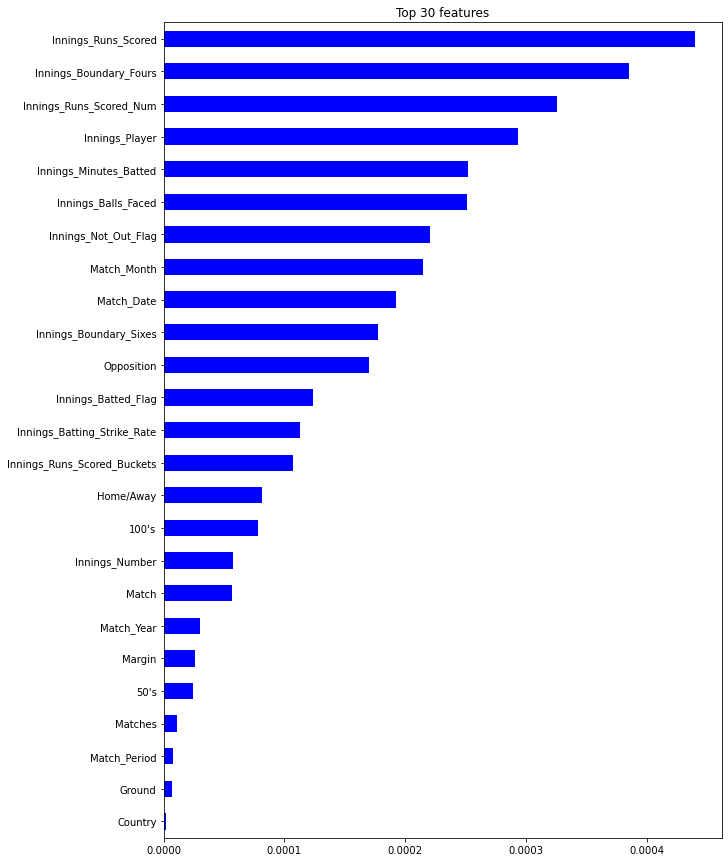

In [75]:
# Get feature importances
n1 = len(X_train.columns)
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_[0:n1], X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [81]:
import eli5
from eli5.sklearn import PermutationImportance

# Ignore warnings

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)



feature_names = X_val.columns.tolist()

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

C:\Users\alfar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\alfar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1083 ± 0.0134,Innings_Number
0.0897 ± 0.0074,Margin
0.0075 ± 0.0064,Innings_Player
0.0056 ± 0.0041,Match
0.0055 ± 0.0036,Innings_Not_Out_Flag
0.0042 ± 0.0021,Innings_Minutes_Batted
0.0019 ± 0.0062,Innings_Boundary_Sixes
0.0014 ± 0.0064,Innings_Boundary_Fours
0.0014 ± 0.0030,Innings_Runs_Scored_Num
0.0010 ± 0.0097,Ground


# Trying again dropping some of the less important columns

In [67]:
column = ["50's", "100's", 'Match_Year', 'Ground', 'Home/Away', 
          'Country', 'Innings_Number', 'Match_Period', 'Margin']
features = [x for x in features if x not in column]


In [68]:
print(features)

['Innings_Batted_Flag', 'Innings_Not_Out_Flag', 'Matches', 'Innings_Player', 'Innings_Runs_Scored', 'Innings_Runs_Scored_Num', 'Innings_Minutes_Batted', 'Innings_Balls_Faced', 'Innings_Boundary_Fours', 'Innings_Boundary_Sixes', 'Innings_Batting_Strike_Rate', 'Opposition', 'Match_Date', 'Innings_Runs_Scored_Buckets', 'Match', 'Match_Month']


In [70]:
X_train_ = battrain[features]
y_train_ = battrain[target]
X_val_ = batval[features]
y_val_ = batval[target]
X_test_ = battest[features]
y_test_ = battest[target]

In [71]:
%%time
pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)


pipeline.fit(X_train_, y_train_)
print('Validation Accuracy', pipeline.score(X_val_, y_val_))
print('Test Accuracy', pipeline.score(X_test_, y_test_))

Validation Accuracy 0.6888544891640866
Test Accuracy 0.5519859813084113
Wall time: 15 s


In [72]:
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=0, n_jobs=-1)
)

pipeline.fit(X_train_, y_train_)
print('Validation Accuracy', pipeline.score(X_val_, y_val_))
print('Test Accuracy', pipeline.score(X_test_, y_test_))

Validation Accuracy 0.7004643962848297
Test Accuracy 0.5268691588785047


In [15]:
bowltrain = dfbowl_merge[dfbowl_merge.Match_Year.between(2014,2017)]
bowlval = dfbowl_merge[dfbowl_merge['Match_Year'] == 2018]
bowltest = dfbowl_merge[dfbowl_merge['Match_Year'] == 2019]
bowltrain.shape, bowlval.shape, bowltest.shape

bowltrain['Result'].value_counts(normalize=True)

Won     0.505567
Lost    0.458246
N/R     0.032359
Tied    0.003827
Name: Result, dtype: float64

In [16]:
target = 'Result'


bowltrain_features1 = bowltrain.drop(columns=[target])

numeric_features1 = bowltrain_features1.select_dtypes(include='number').columns.tolist()

cardinality1 = bowltrain_features1.select_dtypes(exclude='number').nunique()

categorical_features1 = cardinality1.index.tolist()

features1 = numeric_features1 + categorical_features1


print(features)

['Innings_Batted_Flag', 'Innings_Not_Out_Flag', "50's", "100's", 'Match_Year', 'Matches', 'Innings_Player', 'Innings_Runs_Scored', 'Innings_Runs_Scored_Num', 'Innings_Minutes_Batted', 'Innings_Balls_Faced', 'Innings_Boundary_Fours', 'Innings_Boundary_Sixes', 'Innings_Batting_Strike_Rate', 'Innings_Number', 'Opposition', 'Ground', 'Match_Date', 'Country', 'Innings_Runs_Scored_Buckets', 'Margin', 'Match', 'Home/Away', 'Match_Month', 'Match_Period']


In [17]:
X_train1 = bowltrain.drop(columns=target)
y_train1 = bowltrain[target]
X_val1 = bowlval.drop(columns=target)
y_val1 = bowlval[target]
X_test1 = bowltest.drop(columns=target)
y_test1 = bowltest[target]

In [18]:
%%time
pipeline1 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)


pipeline1.fit(X_train1, y_train1)
print('Validation Accuracy', pipeline1.score(X_val1, y_val1))
print('Test Accuracy', pipeline1.score(X_test1, y_test1))

Validation Accuracy 0.5625668449197861
Test Accuracy 0.5108527131782946
Wall time: 717 ms


In [43]:
%%time
pipeline1 = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=0, n_jobs=-1)
)


pipeline1.fit(X_train1, y_train1)
print('Validation Accuracy', pipeline1.score(X_val1, y_val1))
print('Test Accuracy', pipeline1.score(X_test1, y_test1))

Validation Accuracy 0.679144385026738
Test Accuracy 0.5441860465116279
Wall time: 7.48 s


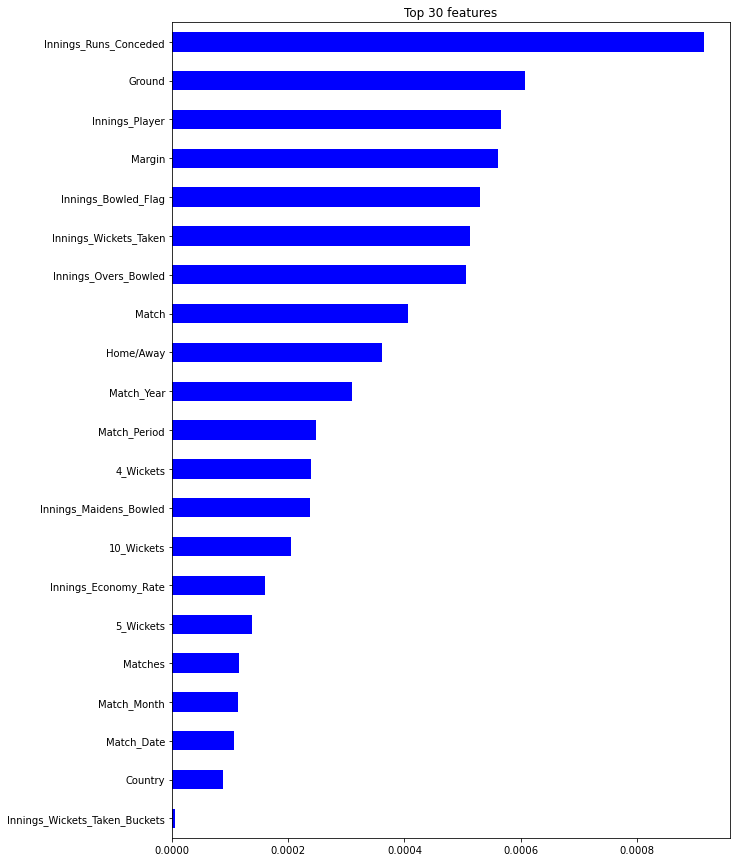

In [80]:
n2 = len(X_train1.columns)
rf1 = pipeline1.named_steps['randomforestclassifier']
importances1 = pd.Series(rf1.feature_importances_[0:n2], X_train1.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances1.sort_values()[-n:].plot.barh(color='blue');